In [1]:
import pandas as pd
import numpy as np

# vizualization
import seaborn as sea  
import matplotlib.pyplot as plt
%matplotlib inline


# normalization and test sample
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  algorithm
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
apple_df = pd.read_csv("../input/apple-revenue-from-1980-to-2022/applerevenue .csv")
print(apple_df.info())
print(apple_df.shape)
print(apple_df.columns)
apple_df = apple_df.drop(["date"], axis=1)

X = apple_df.drop(["profit or not"], axis=1)
y = apple_df["profit or not"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape)
print(y_train.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10559 entries, 0 to 10558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 577.6+ KB
None
(10559, 7)
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'profit or not'], dtype='object')
(7391, 5)
(7391,)


In [10]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [11]:
print(accuracy_score(y_test,tree_pred))
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

0.5830176767676768
[[ 790  857]
 [ 464 1057]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.54      1647
           1       0.55      0.69      0.62      1521

    accuracy                           0.58      3168
   macro avg       0.59      0.59      0.58      3168
weighted avg       0.59      0.58      0.58      3168



In [15]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [16]:
print(accuracy_score(y_test,tree_pred))
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

0.6003787878787878
[[1146  501]
 [ 765  756]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.64      1647
           1       0.60      0.50      0.54      1521

    accuracy                           0.60      3168
   macro avg       0.60      0.60      0.59      3168
weighted avg       0.60      0.60      0.60      3168



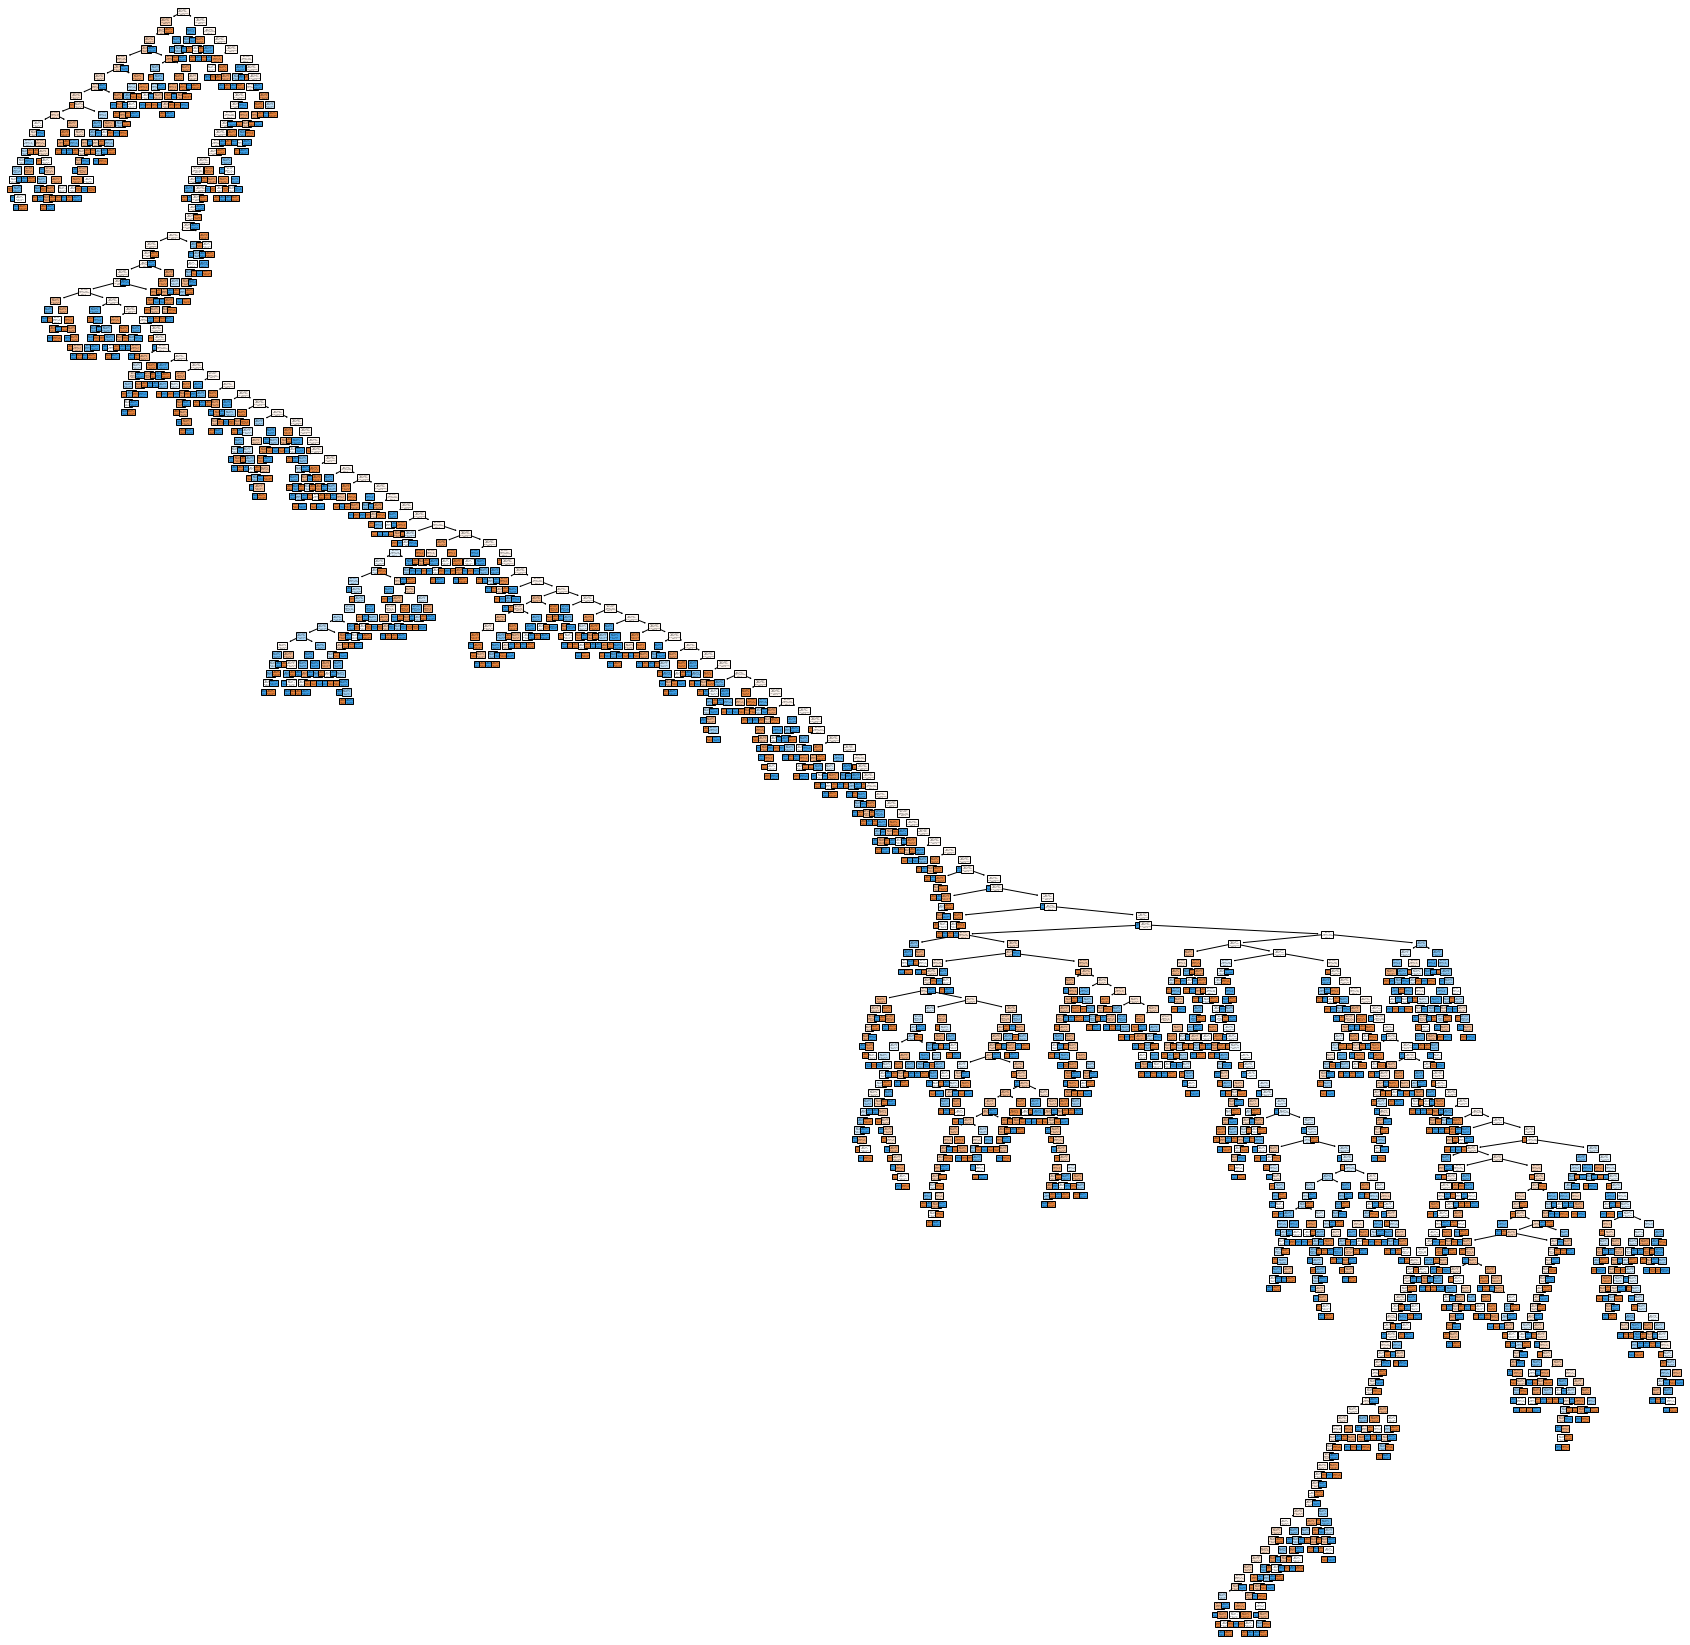

In [14]:
plt.figure(figsize = (30, 30))
plot_tree(tree, feature_names = ['open', 'high', 'low', 'close', 'volume', 'profit or not'], 
          class_names = ["0", "1"], filled = True)
plt.show()